In [1]:
from pomegranate import *
import numpy as np
import pandas as pd
import xarray as xr

# https://pomegranate.readthedocs.io/en/latest/HiddenMarkovModel.html
# https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_3_Hidden_Markov_Models.ipynb

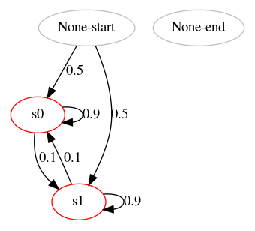

In [78]:
# Create a HMM to sample from (taken from the example notebook).
d1 = DiscreteDistribution({'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25})
d2 = DiscreteDistribution({'A': 0.10, 'C': 0.40, 'G': 0.40, 'T': 0.10})
s1 = State(d1, name='s0')
s2 = State(d2, name='s1')
hmm1 = HiddenMarkovModel()
hmm1.add_states(s1, s2)
hmm1.add_transition(hmm1.start, s1, 0.5)
hmm1.add_transition(hmm1.start, s2, 0.5)
hmm1.add_transition(s1, s1, 0.9)
hmm1.add_transition(s1, s2, 0.1)
hmm1.add_transition(s2, s1, 0.1)
hmm1.add_transition(s2, s2, 0.9)
hmm1.bake()
hmm1.plot()

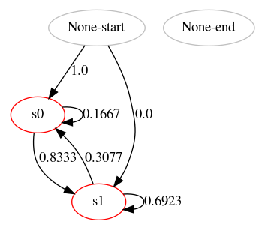

In [91]:
# Sample from HMM1.
X = [hmm1.sample(length = 20)]

# Create a new HMM from data sampled from the old one.
hmm2 = HiddenMarkovModel.from_samples(DiscreteDistribution, n_components = 2, X = X)
hmm2.plot()

-67.59161400978275
-69.3994933108476
-69.4519527212572
-68.88839602391343
-69.38073261427499
-67.61142350039601
-61.51791766841445
-66.746070653688
-63.12714389703288
-63.437858876497806


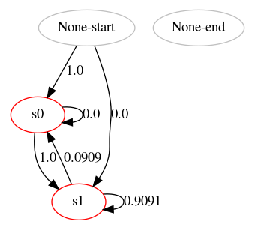

In [94]:
# Create new samples and update model.
for i in range(10):
    X, path = hmm1.sample(length = 50, path = True)
    hmm2.fit(sequences = [X], algorithm = 'viterbi', inertia = 0.99)
    print(hmm2.log_probability(X))

hmm2.plot()

In [89]:
y = []
for j in range(50):
    y += [path[j].name]
print(len(y))
print(len(X))
#print(hmm2.score(X = X, y = path))
# FIGURE OUT HOW TO EVALUATE MODEL FIT: CREATE A LEARNING CURVE.

50
50


AttributeError: 'bool' object has no attribute 'mean'